# 👥 Ensemble Learning

In English, an `ensemble` is a group of musicians, actors, or dancers who regularly perform together. 

In machine learning, an ensemble model is a model $E$ that wraps a set of $T$ models ${M_1,M_2,...,M_T}$ where the prediction (i.e., classification or regression) of the model $E$ is decided by combining the predictions of the models ${M_1,M_2,...,M_T}$ in some way.

#### There are four main types of Ensemble learning:


- **🚀 Boosting**

- **🛍️ Bagging**


- **🏛 Voting**

- **🥞 Stacking**

We will learn about each type below:

## 🚀 Boosting

We have already seen boosting in the last lab. In boosting, we sequentially train a set of models ${M_1,M_2,...,M_T}$ such that $M_{t}$ gives more emphasis to the errors of classifiers $M_{t-1}, M_{t-2},...$.

AdaBoost is the original boosting algorithm and was developed by Freund and Schapire. After it was developed, it was observed that applying Adaboost is equivalent to iteratively minimizing the exponential loss function to find the weights of the classifiers.

Thus, Gradient Boosting was developed as a generalization of AdaBoost that does not assume a particular loss function to minimize (and minimizes it via an optimization algorithm such as gradient descent). 

One other very well known and successful instance of gradient boosting is `Extreme Gradient Boosting` or `XGBoost` which mainly adds regularization to the algorithms (which we discussed before). With this, the decision trees can sequentially grow during boosting under the control of regularization. It also uses a faster optimization algorithm called Newton's method and introduces parallel processing. 

Other popular variants include `LightGBM`, `CatBoost` and more.

Let's compare Adaboost and XGBoost

In [3]:
!pip install xgboost            # It's not in Scikit-learn

ERROR: Invalid requirement: '#'


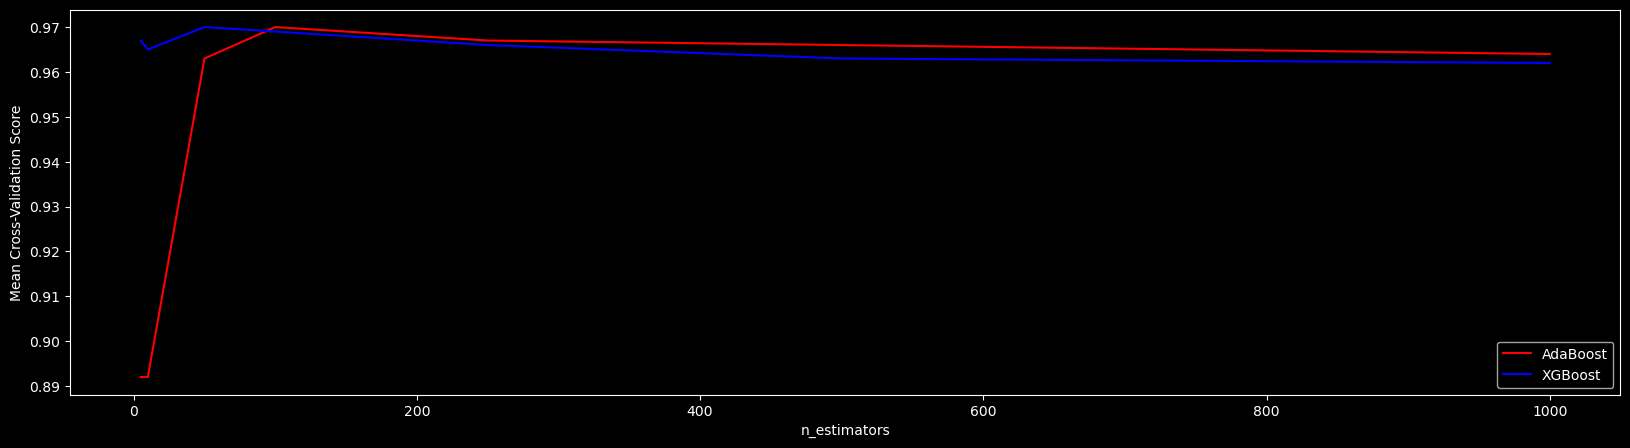

In [4]:
# Question: I'm confused concerning who uses a particular loss function and who doesn't. 

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import numpy as np

# Generate the make_moons dataset
x_data, y_data = make_moons(n_samples=1000, noise=0.2, random_state=42)

n_estimators_list = [5, 10, 50, 100, 250, 500, 1000]
adaboost_scores = []
xgboost_scores = []

for n_estimators in n_estimators_list:
    # TODO 1: Train Adaboost with the given n_estimators, algorithm='SAMME', and random_state=42 then perform cross-validation with K=5
    adaboost_clf = AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME', random_state=42)
    adaboost_cv_scores = cross_val_score(adaboost_clf, x_data, y_data, cv=5)
    adaboost_mean_cv_score = np.mean(adaboost_cv_scores)
    adaboost_scores.append(adaboost_mean_cv_score)

    # TODO 2: Train XGBoost with the given n_estimators and random_state=42 then perform cross-validation with K=5
    xgboost_clf = XGBClassifier(n_estimators=n_estimators, random_state=42)
    xgboost_cv_scores = cross_val_score(xgboost_clf, x_data, y_data, cv=5)
    xgboost_mean_cv_score = np.mean(xgboost_cv_scores)
    xgboost_scores.append(xgboost_mean_cv_score)

# Plotting
plt.style.use("dark_background")
plt.figure(figsize=(20, 5), dpi=100)  
plt.plot(n_estimators_list, adaboost_scores, label='AdaBoost', color='red')
plt.plot(n_estimators_list, xgboost_scores, label='XGBoost', color='blue')
plt.xlabel('n_estimators')
plt.ylabel('Mean Cross-Validation Score')
plt.legend()
plt.show()

# Question: I am unable to interpret the plot.

## 🛍️ Bagging (Bootstrap Aggregation)

In bagging, after initializing the $T$ models $M_1, M_2,...,M_T$ we form $T$ bootstrapped training set $D_1, D_2,...,D_T$ by taking $T$ **random samples with replacement** from the original dataset $D$. The size of bootstrapped datasets is a ratio in $(0,1]$ of the size of $D$ that can be chosen as a hyperparameter.

 Afterwards, it trains model $M_i$ on dataset $D_i$ and then combines the predictions of the models $M_1, M_2,...,M_T$ by averaging for regression and majority voting or averaging probabilities (soft voting) for classification. 

In case of averaging probabilties, we have
$$\hat{y} = \arg\max_{c} \left( \frac{1}{T} \sum_{i=1}^{T} p_{i,c} \right)$$

That is, we return the class with the highest average probability over all $T$ classifiers $M_1, M_2,...,M_T$. These models are different after training because they were trained on different (but overlapping) datasets $D_1, D_2,...,D_T$.

In bagging, $M_i$ is usually a strong classifiers which may be even overfitting. It can be mathematically and visually shown that even if $M_i$ overfits $D_i$, their combination $E$ will reduce overfitting on the original training $D$. Thus, bagging can be sought when the model seems to be overfitting.

<div align="center">
   <img width="900" src="https://i.imgur.com/FLEa2bb.png">
</div>

Utilizing strong classifiers is the first difference between bagging and boosting. The second different is that the classifiers are independently, and not sequentually trained.

<br>
<br>
By your understanding of Random Forests, it follows from this definition that:

$$\text{Random Forest} = \text{Bagging(Decision Tree)} + \text{Column Subsampling}$$

where column subsampling refers to using only $N_s$ features chosen randomly for each split in any tree.

Thus, we will proceed as follows:
1. Implement bagging for any model family $M$ with optional column subsampling in `Bagging.py`. 

      - We will use averaging probabilities instead of majority vote because it's faster.
      
2. Use it to implement Random Forest by letting the model family $M$ be decision tree in `RandomForest.py`

### 🧪 Bagging Tests

Previously, we had put these tests in the notebook for convenience; however, it's important to note that in industry what happens is:
- A testing library such as `unittests` is used to wrap the tests in a class (each test given by a function that makes some `assertions`)

- The file containing the tests (i.e., `BaggingTest.py`) is run via a Github action for each push, PR, etc. (simply by running the test file as in the cell below) and it's expected that this file must be extended when any new feature is added

- Usually there are tools that check the coverage of the tests (i.e., what percentage of the lines of code in the implementation file(s) are processed in the test file). Usually, you should aim for close to `100%` coverage.

- Large language models have made the testing process easier as it's not hard for them to generate the tests from described expected behaviour but this has to be done with extreme caution.

In [5]:
# Question: Elaborate on "classifiers are independently, and not sequentually trained", why would it matter?
import subprocess

command = "python -m unittest discover -s . -p 'BaggingTest.py'"
try:
    subprocess.run(command, shell=True, check=True)
except subprocess.CalledProcessError as e:
    print("Error occurred while running tests:", e)

Note that the file only tests the two core additions of bagging: bootstrap sampling and majority voting.

### 🌲🌳 Random Forests

In [6]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from RandomForest import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from Plot import plot_model_contours
import pandas as pd

##### 🧪 Quick End-to-end Test

This is a weak test but we're constrained due to randomization and bagging is already tested.

In [7]:
x_data, y_data = make_classification(n_samples=10000, n_classes=2, n_features=4, random_state=45)
random_forest_clf = RandomForestClassifier(n_estimators=10, max_features=2, min_samples_split=2, max_depth=45, random_state=42)
random_forest_clf_sk = RFC(n_estimators=10, max_features=2, min_samples_split=2, max_depth=45, random_state=42)
random_forest_clf.fit(x_data, y_data)
random_forest_clf_sk.fit(x_data, y_data)
assert np.allclose(random_forest_clf.score(x_data, y_data), random_forest_clf_sk.score(x_data, y_data),  atol=0.001)

Now let's reproduce what we did with decision trees:

In [8]:
# read the dataset
df = pd.read_csv('penguins-clean.csv')

x_data_pd, y_data_pd = df.drop(columns=['Species']), df['Species']
x_data, y_data = x_data_pd.to_numpy(), y_data_pd.to_numpy()
y_data = LabelEncoder().fit_transform(y_data)

In [9]:
# TODO 3: Repeat the hyperparameter search done in DecisionTree.ipynb but this time for random forest
# Must use their model for this as ours doesn't perfectly satisfy their API. After this we get back to using ours.

# random_forest_clf_sk = RFC(n_estimators=10, max_features=2, min_samples_split=2, max_depth=45, random_state=42)
# clf_searched = RandomizedSearchCV(clf, param_dist, n_iter=200, cv=5, random_state=42)

clf = RFC()                                                                     

# Define the hyperparameters distribution (use same ranges as before)
param_dist = {
    'n_estimators': np.arange(2, 100), 
    'min_samples_split': range(2, 51),                      # 2 to 50
    'min_samples_leaf': range(1, 21),                       # 1 to 20
    'max_depth': range(5, 51, 5),                           # 5 to 50 with step of 5
    'min_impurity_decrease': np.linspace(0.1, 0.3, 20)      # Decide a reasonable range here (with 20 values)
}

# Initialize RandomizedSearchCV
clf_searched = RandomizedSearchCV(clf, param_dist, n_iter=200, cv=5, random_state=42)

clf_searched.fit(x_data, y_data)

relevant_columns = ['param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_depth', 'param_min_impurity_decrease', 
                    'mean_test_score', 'std_test_score', 'rank_test_score']
cv_results_df = pd.DataFrame(clf_searched.cv_results_)[relevant_columns].round(decimals=3).sort_values(by='rank_test_score')
cv_results_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_min_impurity_decrease,mean_test_score,std_test_score,rank_test_score
138,94,23,6,10,0.205263,0.918,0.034,1
137,17,20,18,10,0.152632,0.918,0.030,2
75,68,16,6,20,0.184211,0.918,0.035,2
135,13,38,7,50,0.1,0.915,0.032,4
184,47,25,7,30,0.205263,0.915,0.048,4
104,49,34,4,30,0.131579,0.915,0.037,6
155,79,13,6,35,0.194737,0.915,0.035,6
5,84,10,13,30,0.194737,0.915,0.030,6
173,42,31,11,25,0.1,0.915,0.037,6
177,21,25,11,15,0.152632,0.915,0.037,6


```python
TODO 4: How much extra performance was perceived form using random forests?
```

In [10]:
"""
The mean test score increased from 0.915 to 0.918
"""

'\nThe mean test score increased from 0.915 to 0.918\n'

### 🌀 Decision Trees and Overfitting:

Hyperparameters: 100%|██████████| 7/7 [00:01<00:00,  6.16it/s]


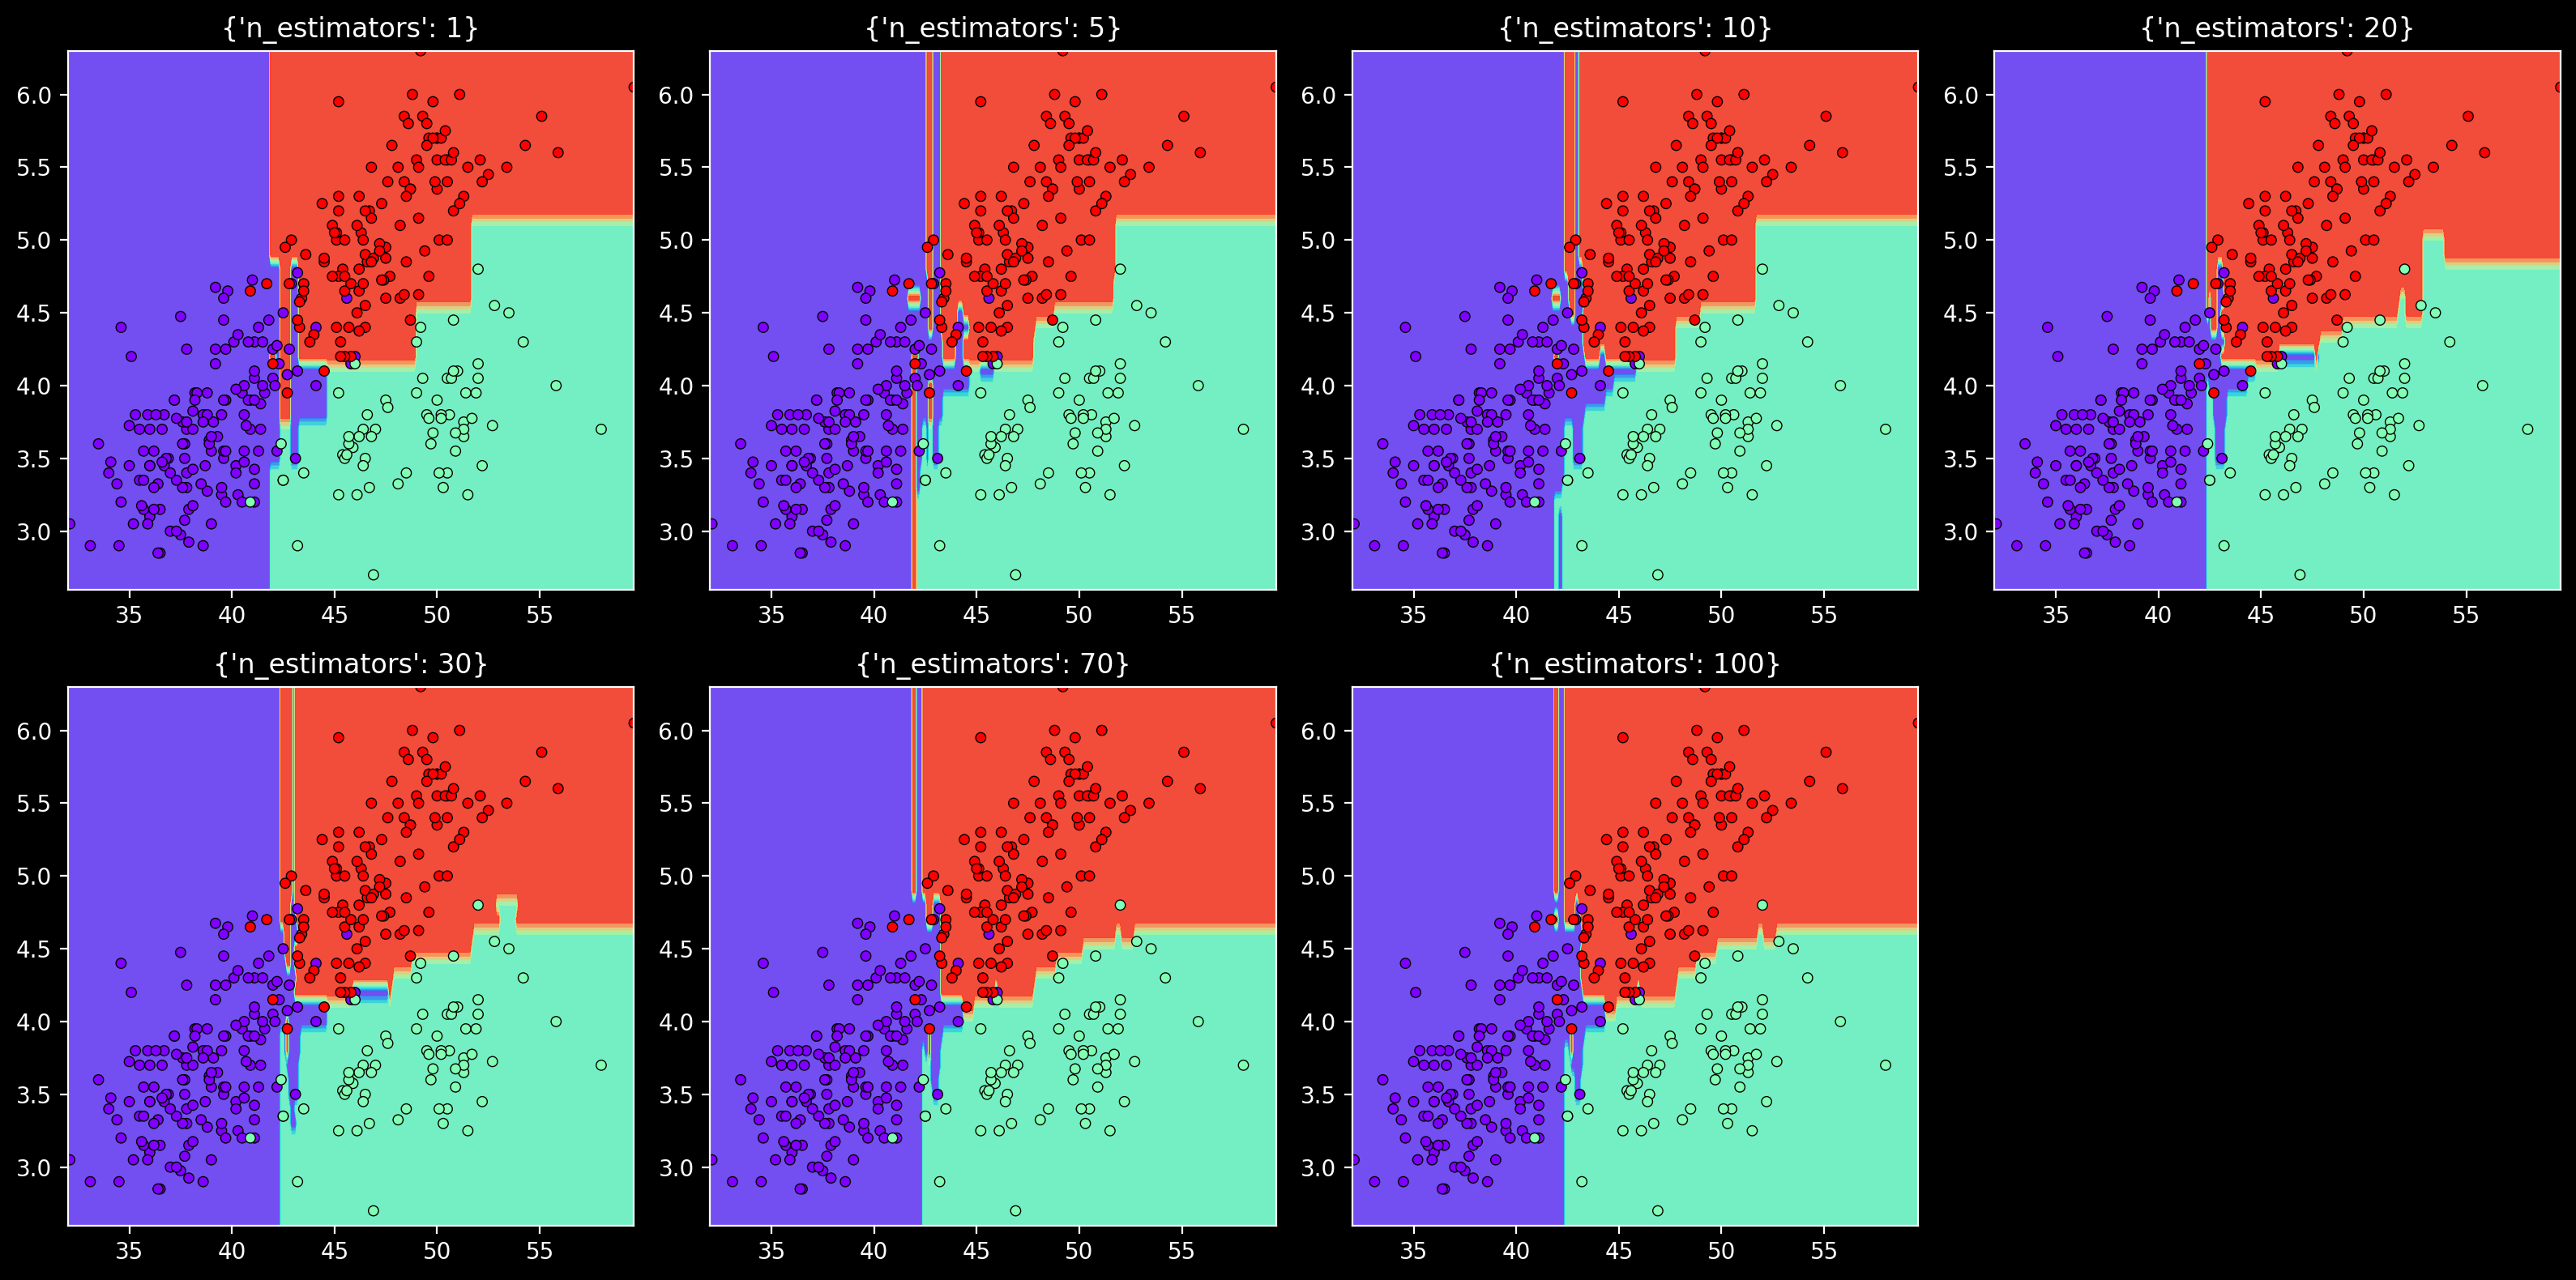

In [11]:
# Define the DecisionTreeClassifier model
random_forest_clf = RandomForestClassifier(max_depth=15, max_samples=0.5, max_features=2, random_state=42)

# TODO 5: Try 1, 5, 10, 20, 30, 70, 100 for n_estimators
hyperparams_list = [
    {'n_estimators': 1},
    {'n_estimators': 5},
    {'n_estimators': 10},
    {'n_estimators': 20},
    {'n_estimators': 30},
    {'n_estimators': 70},
    {'n_estimators': 100}   
]

# Plot decision boundaries. You can go make some coffee by the time it finishes (or overclock your CPU).
plot_model_contours(random_forest_clf, x_data, y_data, hyperparams_list=hyperparams_list)

```python
TODO 6: What effect did increasing the number of trees from 1 to 200 have on the decision boundary? 
Explain in light of overfitting and the ideal decision boundary.
```

In [12]:
"""
Answer goes here
"""

'\nAnswer goes here\n'

Note that although we only apply bagging on decision trees in this experiment, `Bagging` can be used on any strong classifier (e.g., `SVM`, `QDA`, `NaiveBayes`, etc.) or regressor to reduce its ability to overfit.

## 🏛 Voting

Voting is the simplest ensemble you can think of. It assumes that the models $M_1, M_2,...,M_T$ are heterogenous (e.g., one is an `SVM`, the other is `QDA` and so on) and it simply trains each model on the entire dataset then predicts labels by hard or soft        majority voting.


Hard Voting:
$$\hat{y} = \arg \max_{c} \sum_{i=1}^{T} I(y_i = c)$$ 

Soft Voting:
$$\hat{y} = \arg\max_{c} \left( \frac{1}{T} \sum_{i=1}^{T} p_{i,c} \right)$$

In other words, it's similar to bagging except that know random sampling happens to the dataset or feature (i.e., each model trained on same original dataset) and the models are usually not of the same family.

Like `Bagging`, it's easy to do `Voting` in Scikit-learn.

In [13]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# 1. Load the breast cancer dataset
x_data, y_data = load_breast_cancer(return_X_y=True)

# 2. Define classifiers
clf1 = LinearDiscriminantAnalysis()
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

classifiers = [('LDA', clf1), ('RF', clf2), ('GNB', clf3)]

# 3. Train and evaluate each classifier individually using cross-validation
for name, clf in classifiers:
    scores = cross_val_score(clf, x_data, y_data, cv=5)  
    print(f"{name} Accuracy: {np.mean(scores):.4f}")

# 4. Hard voting classifier
eclf1 = VotingClassifier(estimators=classifiers, voting='hard')

# 5. Evaluate the hard voting classifier using cross-validation
scores = cross_val_score(eclf1, x_data, y_data, cv=5)  
print(f"Hard Voting Classifier Accuracy: {np.mean(scores):.4f}")

LDA Accuracy: 0.9596
RF Accuracy: 0.9578
GNB Accuracy: 0.9385
Hard Voting Classifier Accuracy: 0.9508


As this shows, the majority can be wrong sometimes (i.e., weaker models making similar mistakes and few strong models)

## 🥞 Stacking

Stacking tries to improve upon voting by making the observation that it's not best to give the same weight to the different classifiers. It's smarter to train a `judge model` on top of these classifiers to learn which models are weak and which are strong by looking at their predictions and the true prediction and assign weights accordingly.

Thus the voting schemes become,   
$$\hat{y} = \arg \max_{c} \sum_{i=1}^{T} w_i*I(y_i = c)$$ 

Or
$$\hat{y} = \arg\max_{c} \left( \frac{1}{T} \sum_{i=1}^{T} w_i*p_{i,c} \right)$$

This gives a great intuitive idea. In a more general sense, the judge can be any function (not necessarily a linear combination) of the classifiers. In other words, it can be any model in general and it will perceive the predicitons of the base models as its features and train to choose the correct label given their predictions.

In [14]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 1. Load the breast cancer dataset
x_data, y_data = load_breast_cancer(return_X_y=True)

# 2. Define classifiers
clf1 = LinearDiscriminantAnalysis()
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

base_classifiers = [('LDA', clf1), ('RF', clf2), ('GNB', clf3)]

# 3.Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=RandomForestClassifier(n_estimators=50, random_state=1),
    stack_method='predict'
)
         
# 4.Evaluate the stacking classifier using cross-validation
scores = cross_val_score(stacking_clf, x_data, y_data, cv=5) 

print(f"Stacking Classifier Accuracy: {np.mean(scores):.4f}")

Stacking Classifier Accuracy: 0.9666


It's quite commonly used in competitions 🤫

<div align="center">
<img src="https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExeWd6OGhvc2lqcGtwajhpZHVxaWFnNGRxeXA4b2s3cXI3aG1xNXd6NiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/l49JHLpRSLhecYEmI/giphy.gif">
</div>